In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pylab as plt

In [3]:
from image_analysis.read_files import *
from image_analysis.fit import plot
from image_analysis.fit import regionprops, statistics
from image_analysis.preprocess import mask

C:\Users\naly008c\.conda\envs\axolotl\Lib\site-packages\pytools\persistent_dict.py:52: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


In [4]:
# makes plotting very slow, should be commented while testing
plt.rcParams['text.usetex'] = True 

In [5]:
df = pd.read_excel("results_from_image_analysis_figure_4.xlsx")

In [6]:
df.loc[df['Regeneration time, dpa'] == 'development', 'Regeneration time, dpa'] = 1

In [7]:
df.head()

,Sample name,HCR,"Animal size, cm","Regeneration time, dpa","Exact animal size (snout to tail), cm","Blastema width, um","x0(Shh), um","x0(Fgf8), um","Volume^1/3(Shh), um","Volume^1/3(Fgf8), um","Volume^1/3(Dusp), um"
0,hcr11_lb27_fl,11,development,1,development,284,42,66,56.082362,96.264030,96.367228
1,hcr11_lb28_fl,11,development,1,development,300,52,88,50.523565,118.366951,76.702625
2,hcr15_lb41_fl,15,development,1,development,250,28,64,52.053200,102.600583,143.503563
3,hcr16_lb44_fl,16,development,1,development,240,50,70,57.340123,118.235668,114.030360
4,hcr16_lb45_fl,16,development,1,development,256,48,74,51.700447,101.728098,125.571400


# Plot

In [8]:
from matplotlib_defaults import *

In [9]:
df['Animal size, cm'].unique()

array(['development', 2.92857142857143, 5.3, 7.2375], dtype=object)

In [10]:
colormap = plt.colormaps['Dark2']
colors = colormap(np.linspace(0, 1, 10))
sizes = df['Animal size, cm'].unique()
size_to_color = {
    sizes[0]: colors[1], 
    sizes[1]: colors[2],
    sizes[2]: colors[3],
    sizes[3]: colors[4]
}
df['color'] = df['Animal size, cm'].map(size_to_color)

# Define the marker mapping
default_marker = 'o'  # Circle marker
# Star marker for HCR = 23, another method for dusp staning
df['marker'] = df['HCR'].apply(lambda x: '*' if x == 23 else default_marker)

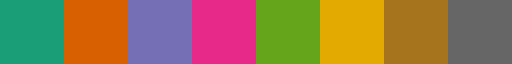

In [11]:
colormap

In [12]:
df = df.dropna(subset=['Regeneration time, dpa'])

In [13]:
df.head()

,Sample name,HCR,"Animal size, cm","Regeneration time, dpa","Exact animal size (snout to tail), cm","Blastema width, um","x0(Shh), um","x0(Fgf8), um","Volume^1/3(Shh), um","Volume^1/3(Fgf8), um","Volume^1/3(Dusp), um",color,marker
0,hcr11_lb27_fl,11,development,1,development,284,42,66,56.082362,96.264030,96.367228,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
1,hcr11_lb28_fl,11,development,1,development,300,52,88,50.523565,118.366951,76.702625,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
2,hcr15_lb41_fl,15,development,1,development,250,28,64,52.053200,102.600583,143.503563,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
3,hcr16_lb44_fl,16,development,1,development,240,50,70,57.340123,118.235668,114.030360,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
4,hcr16_lb45_fl,16,development,1,development,256,48,74,51.700447,101.728098,125.571400,"[0.10588235294117647, 0.6196078431372549, 0.46...",o


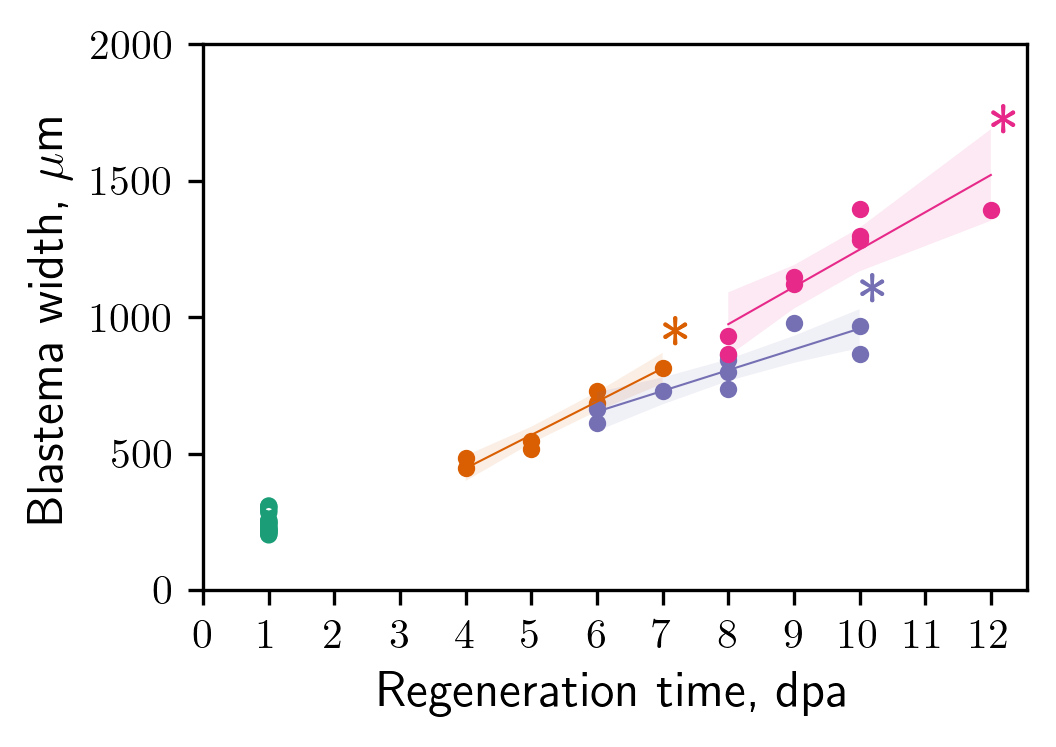

In [14]:
fig = plt.figure(figsize=default_figsize['small'])
ax = plt.subplot()

to_plot = 'Blastema width, um'
    
df_to_plot = df.dropna(subset=[to_plot])

for size in sizes:
    df_regr = df_to_plot[df_to_plot['Animal size, cm'] == size]
    x, y = np.array(df_regr['Regeneration time, dpa']), np.array(df_regr[to_plot]) # um
    x, y = x[~np.isnan(y)].astype(float), y[~np.isnan(y)].astype(float)  # Remove NaNs
    x, y = x[~np.isnan(x)], y[~np.isnan(x)]  # Remove NaNs

    if size != 'development':
        plot.add_regr(ax, x, y, size_to_color[size], '', fit_intercept=True, extend_to_zero=False)
        ax.scatter(
            x, y,
            edgecolor=size_to_color[size], facecolor=size_to_color[size],
            s=10  # Marker size
        )
    else:
        ax.scatter(
            x, y,
            edgecolor=size_to_color[size], facecolor='none',
            s=10  # Marker size
        )

ax.set_xlabel( 'Regeneration time, dpa' )
ax.set_ylabel( 'Blastema width, $\mu$m' )

plt.xticks(np.arange(-0, 13, 1)) 
ax.set_ylim(0, 2000)
plt.savefig(f'fig/figure_1c.pdf')
plt.show()